In [75]:
import pandas as pd

file_path = r'C:\Users\YaraAlaqeel\data_analysis\modified_data.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"File '{file_path}' not found. Please check the file path and try again.")
except Exception as e:
    print(f"Error loading dataset: {str(e)}")

Dataset loaded successfully!


In [76]:
import pandas as pd
import plotly.express as px


# Group by 'education_level' and 'relevent_experience' and count the occurrences
grouped_data = df.groupby(['education_level', 'relevent_experience']).size().reset_index(name='count')

# Plotting the results using Plotly
fig = px.bar(grouped_data, x='education_level', y='count', color='relevent_experience', 
             title='Relevant Experience by Education Level',
             labels={'education_level': 'Education Level', 'count': 'Count', 'relevent_experience': 'Relevant Experience'},
             barmode='group', 
             template='simple_white')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


* Graduates have the highest amount of relevant experience.
* The counts for PhD and primary school levels are too low to draw substantial conclusions about relevant experience.

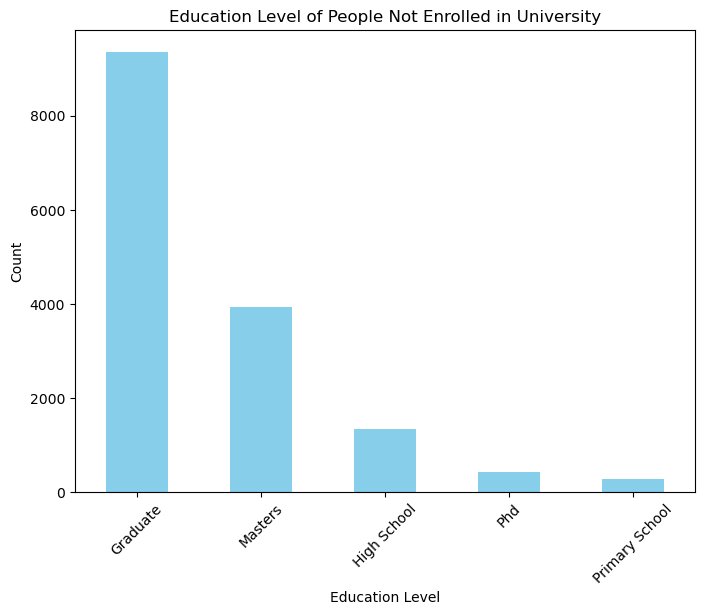

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

education_counts = df[df['enrolled_university'] == 'no_enrollment']['education_level'].value_counts()

plt.figure(figsize=(8, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.title('Education Level of People Not Enrolled in University')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


* The most common education level among those that are not enrolled in university is at the graduate level also.

* Counclusion: Graduate-level education appears to be common among both groups—those enrolled and those not enrolled in university. This observation highlights its significance in the workforce or career aspirations regardless of current enrollment status in formal university programs.

### Question1: What are the cities that have the lowest development index?

City with the lowest development index: 0.4185965477174413


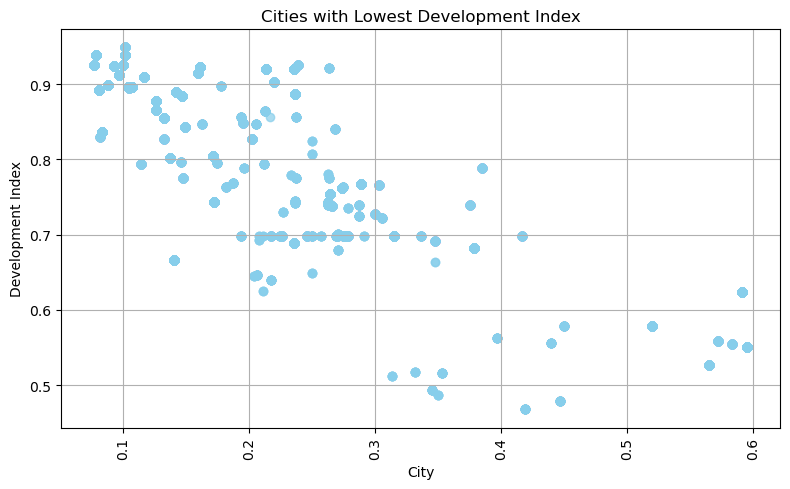

In [49]:
df_sorted = df.sort_values(by='city_development_index')
lowest_dev_index_city = df_sorted.iloc[0]
print(f"City with the lowest development index: {lowest_dev_index_city['city']}")

plt.figure(figsize=(8, 5))
plt.scatter(df_sorted['city'], df_sorted['city_development_index'], color='skyblue', alpha=0.7)
plt.title('Cities with Lowest Development Index')
plt.xlabel('City')
plt.ylabel('Development Index')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

* Cities with the lowest development indices have been identified, with the lowest being 0.4186. It has been observed that cities with lower development indices are more likely to have data scientist experiencing job changes, because the city is encoded using the target encoder. In contrast, cities with higher development indices are less likely to have data scientist experiencing job changes.

### Question2: How does the city development index affect the distribution of education levels?

C:\Users\YaraAlaqeel\AppData\Local\Temp\ipykernel_16768\1355779790.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



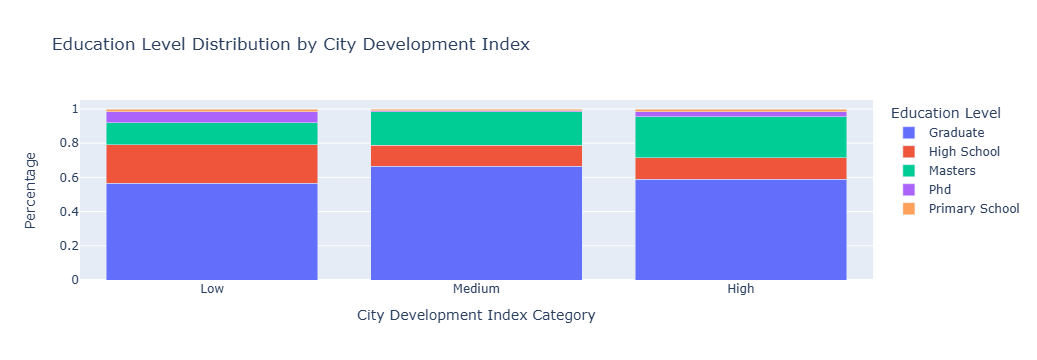

In [50]:
import pandas as pd
import plotly.express as px

bins = [0, 0.5, 0.7, 1]
labels = ['Low', 'Medium', 'High']

df['development_index_category'] = pd.cut(df['city_development_index'], bins=bins, labels=labels)

education_distribution = df.groupby('development_index_category')['education_level'].value_counts(normalize=True).unstack().fillna(0).reset_index()

education_distribution_melted = education_distribution.melt(id_vars='development_index_category', var_name='education_level', value_name='percentage')

fig = px.bar(education_distribution_melted, 
             x='development_index_category', 
             y='percentage', 
             color='education_level', 
             title='Education Level Distribution by City Development Index',
             labels={'development_index_category': 'City Development Index Category', 'percentage': 'Percentage'},
             barmode='stack')

fig.update_layout(xaxis_title='City Development Index Category', yaxis_title='Percentage', legend_title='Education Level')
fig.show()


* The level of city development doesn't change the overall pattern of education levels much. Graduates are the largest group everywhere, while PhD holders and primary school graduates are the smallest.

### Question3: How does the city development index affect the distribution of university enrollment?

C:\Users\YaraAlaqeel\AppData\Local\Temp\ipykernel_16768\1989382503.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



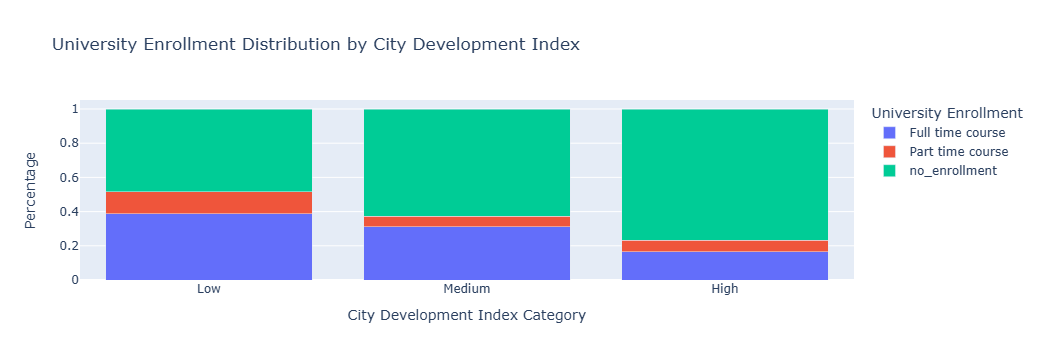

In [51]:

bins = [0, 0.5, 0.7, 1]
labels = ['Low', 'Medium', 'High']
df['development_index_category'] = pd.cut(df['city_development_index'], bins=bins, labels=labels)

enrollment_distribution = df.groupby('development_index_category')['enrolled_university'].value_counts(normalize=True).unstack().fillna(0).reset_index()

enrollment_distribution_melted = enrollment_distribution.melt(id_vars='development_index_category', var_name='enrolled_university', value_name='percentage')
fig = px.bar(enrollment_distribution_melted, 
             x='development_index_category', 
             y='percentage', 
             color='enrolled_university', 
             title='University Enrollment Distribution by City Development Index',
             labels={'development_index_category': 'City Development Index Category', 'percentage': 'Percentage'},
             barmode='stack')

fig.update_layout(xaxis_title='City Development Index Category', yaxis_title='Percentage', legend_title='University Enrollment')
fig.show()

* The level of the development index influences university enrollment, with cities having higher development indices showing a larger proportion of data scientists who are not enrolled in university and a lower proportion of data scientists enrolled in full-time courses.
* This suggests that in more developed cities, despite the availability of educational resources, many individuals may opt out of university education or prefer part-time over full-time enrollment. Conversely, in less developed cities, different factors might influence higher enrollment in full-time courses.

### Question4: How does the city development index affect the distribution of the relevent experience?

C:\Users\YaraAlaqeel\AppData\Local\Temp\ipykernel_16768\1478303005.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



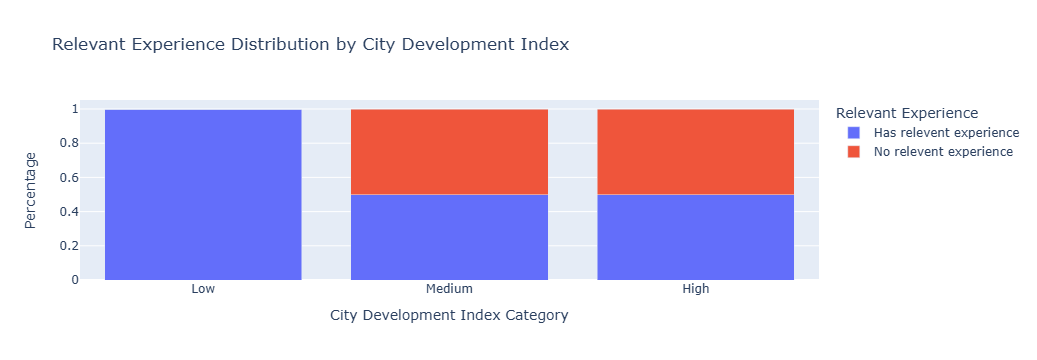

In [52]:
import pandas as pd
import plotly.express as px

data = {
    'city_development_index': [0.45, 0.55, 0.65, 0.75, 0.85],
    'relevent_experience': ['Has relevent experience', 'No relevent experience', 'Has relevent experience', 'No relevent experience', 'Has relevent experience']
}

df = pd.DataFrame(data)

bins = [0, 0.5, 0.7, 1]
labels = ['Low', 'Medium', 'High']

df['development_index_category'] = pd.cut(df['city_development_index'], bins=bins, labels=labels)

experience_distribution = df.groupby('development_index_category')['relevent_experience'].value_counts(normalize=True).unstack().fillna(0).reset_index()

experience_distribution_melted = experience_distribution.melt(id_vars='development_index_category', var_name='relevent_experience', value_name='percentage')

fig = px.bar(experience_distribution_melted, 
             x='development_index_category', 
             y='percentage', 
             color='relevent_experience', 
             title='Relevant Experience Distribution by City Development Index',
             labels={'development_index_category': 'City Development Index Category', 'percentage': 'Percentage'},
             barmode='stack')

fig.update_layout(xaxis_title='City Development Index Category', yaxis_title='Percentage', legend_title='Relevant Experience')
fig.show()


* Cities with low development indices predominantly have data scientists with relevant experience, whereas cities with medium and high development indices show an even split between data scientists with and without relevant experience.

* This indicates that as cities develop further, they tend to have a more varied workforce with different levels of work experience. 

### Question5 :What is the most common education level among those enrolled in university?

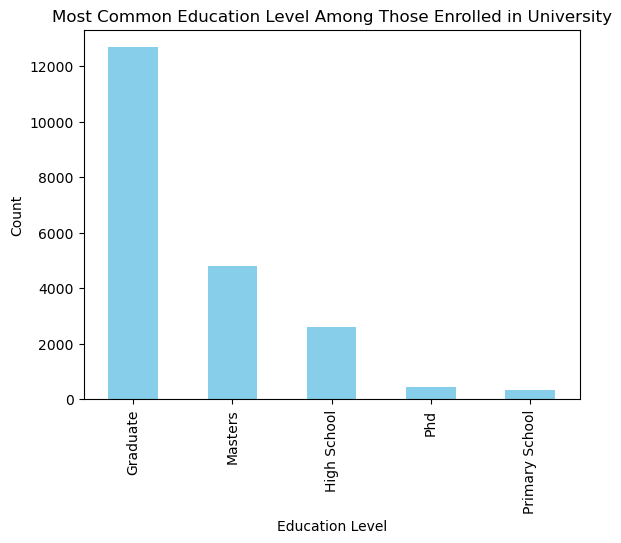

In [14]:
import matplotlib.pyplot as plt

enrolled_in_university = df[df['enrolled_university'].notnull()]
education_counts = enrolled_in_university['education_level'].value_counts()
most_common_education_level = education_counts.idxmax()

education_counts.plot(kind='bar', color='skyblue')
plt.title('Most Common Education Level Among Those Enrolled in University')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


* The most common education level among those enrolled in university is at the graduate level, with over 12,000 individuals.

### Question6: Do individuals with higher education levels tend to have more relevant experience compared to those with lower education levels?

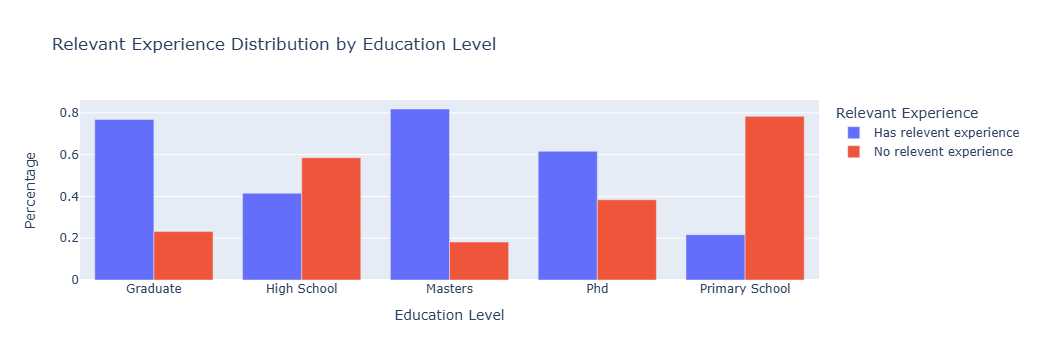

In [57]:
import pandas as pd
import plotly.express as px

experience_distribution = df.groupby('education_level')['relevent_experience'].value_counts(normalize=True).unstack().fillna(0).reset_index()
experience_distribution_melted = experience_distribution.melt(id_vars='education_level', var_name='relevent_experience', value_name='percentage')

fig = px.bar(experience_distribution_melted, 
             x='education_level', 
             y='percentage', 
             color='relevent_experience', 
             title='Relevant Experience Distribution by Education Level',
             labels={'education_level': 'Education Level', 'percentage': 'Percentage'},
             barmode='group')

fig.update_layout(xaxis_title='Education Level', yaxis_title='Percentage', legend_title='Relevant Experience')
fig.show()


* Data scientists with graduate and master's degrees are more likely to have relevant experience. This suggests that higher education levels are associated with greater opportunities or requirements for gaining relevant experience in their field.
* PhD holders show a balanced distribution, with about 60% having relevant experience. This could indicate that while PhD programs emphasize research and specialized knowledge, not all PhD holders gain practical, relevant experience during their studies.
* Individuals with only primary school education are the least likely to have relevant experience. This highlights the challenge of acquiring relevant experience without further education.

### Question7: Do individuals with no enrollment to university tend to have more relevant experience?

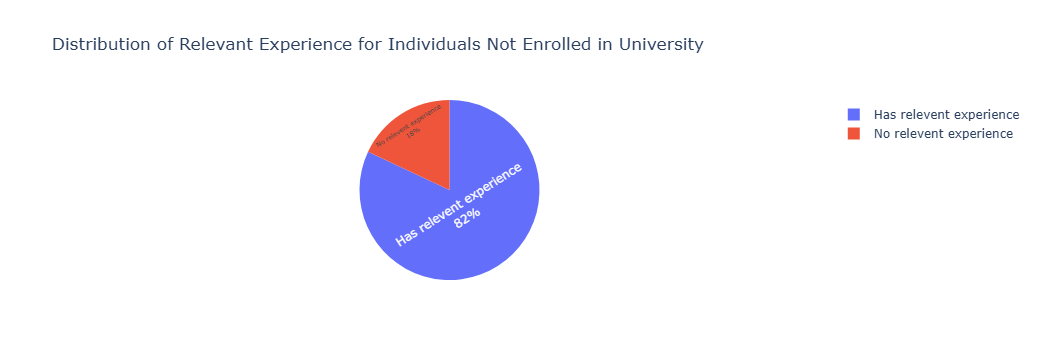

In [62]:

df_no_enrollment = df[df['enrolled_university'] == 'no_enrollment']

experience_distribution = df_no_enrollment['relevent_experience'].value_counts(normalize=True)

fig = px.pie(values=experience_distribution.values, names=experience_distribution.index, 
             title='Distribution of Relevant Experience for Individuals Not Enrolled in University',
             labels={'label': 'Relevant Experience', 'value': 'Percentage'})

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


* 82% of people that  are not enrolled have relevant experience
* This indicates that a significant proportion of individuals without university enrollment have acquired relevant skills and experience through other means, highlighting the diverse pathways and experiences within the workforce outside of formal academic settings.

### Question8: Is there a correlation between university enrollment status and having relevant work experience?

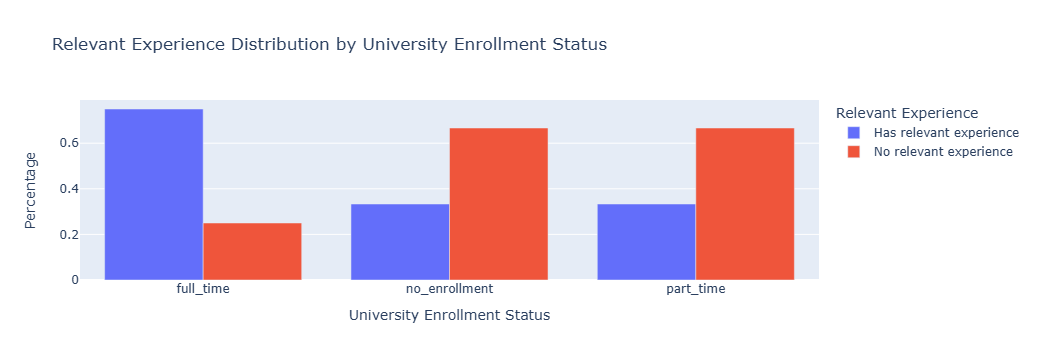

In [67]:
import pandas as pd
import plotly.express as px

experience_distribution = df.groupby('enrolled_university')['relevent_experience'].value_counts(normalize=True).unstack().fillna(0).reset_index()
experience_distribution_melted = experience_distribution.melt(id_vars='enrolled_university', var_name='relevent_experience', value_name='percentage')
fig = px.bar(experience_distribution_melted, 
             x='enrolled_university', 
             y='percentage', 
             color='relevent_experience', 
             title='Relevant Experience Distribution by University Enrollment Status',
             labels={'enrolled_university': 'University Enrollment Status', 'percentage': 'Percentage'},
             barmode='group')

fig.update_layout(xaxis_title='University Enrollment Status', yaxis_title='Percentage', legend_title='Relevant Experience')
fig.show()


* Full-time university enrollees are more likely to have relevant work experience.
* Individuals not enrolled in university have a mix of relevant and irrelevant work experience.
* Part-time enrollees tend to have a higher percentage of individuals without relevant experience.
* The figure indicates that there is a correlation between university enrollment and having relevant work experience. It suggests that full-time enrollment is associated with a higher likelihood of having relevant work experience.

### Question9: Do individuals enrolled in university tend to reside in cities with a high development index?

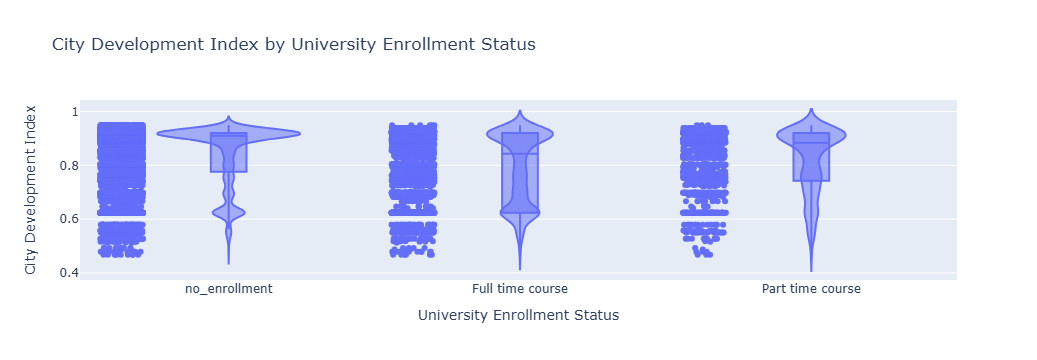

In [78]:
#violin plot
fig = px.violin(df, 
                x='enrolled_university', 
                y='city_development_index', 
                box=True, 
                points='all',
                title='City Development Index by University Enrollment Status',
                labels={'enrolled_university': 'University Enrollment Status', 'city_development_index': 'City Development Index'})

fig.update_layout(xaxis_title='University Enrollment Status', yaxis_title='City Development Index')
fig.show()

* The median city development index for data scientists enrolled in part-time university courses is higher than for those enrolled in full-time courses.
* People who are not enrolled in university live in cities with a wide range of development index values, indicating variability in access to or choices regarding higher education.

### Question10: In which cities do people that didnt enroll university live?

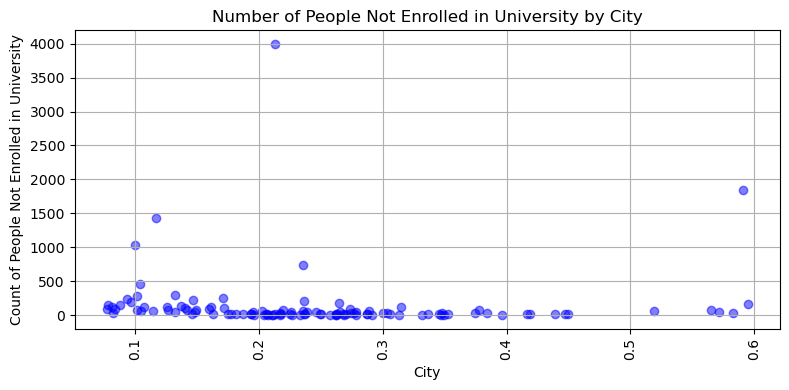

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

no_enrollment_data = df[df['enrolled_university'] == 'no_enrollment'].groupby('city')['enrolled_university'].count().reset_index(name='count')

plt.figure(figsize=(8, 4))
plt.scatter(no_enrollment_data['city'], no_enrollment_data['count'], alpha=0.5, color='blue')
plt.title('Number of People Not Enrolled in University by City')
plt.xlabel('City')
plt.ylabel('Count of People Not Enrolled in University')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


* Most city numbers below 0.2 have a high number of data scientists not enrolled in university.
* City numbers above 0.2 have significantly fewer data scientists not enrolled in university.
